Number of nodes: 20
Number of edges: 30
Degrees of each node:
User 7: 6
User 13.0: 4
User 20: 2
User 15: 3
User 11: 1
User 8: 6
User 17.0: 3
User 19: 3
User 4: 1
User 16.0: 4
User 3: 2
User 2: 2
User 12: 3
User 14.0: 1
User 6: 2
User 18.0: 5
User 1: 3
User 10: 4
User 5: 1
User 9: 4


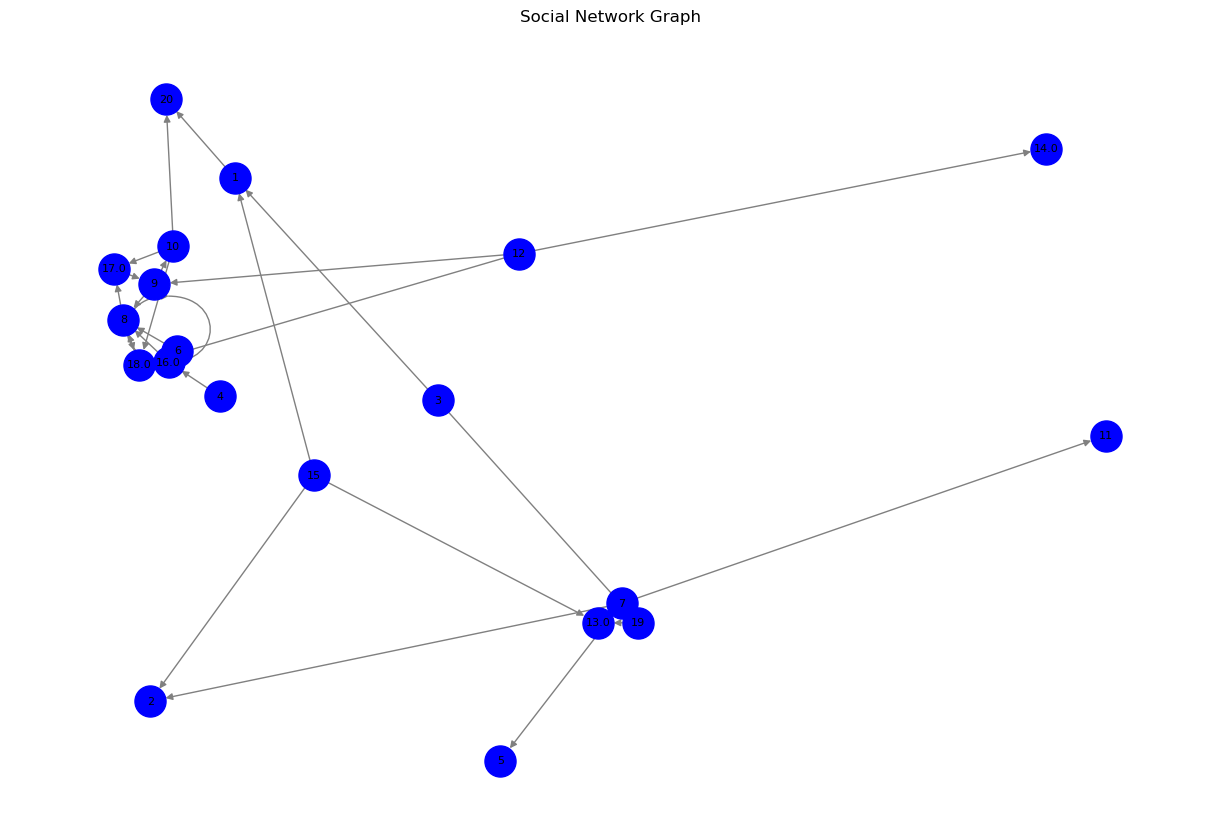

Number of cascades: 1
Cascade 1: {1.0, 2.0, 3, 4, 5.0, 6, 7, 8.0, 9, 10, 11.0, 12, 13.0, 14.0, 15, 16, 17.0, 18.0, 19, 20.0}


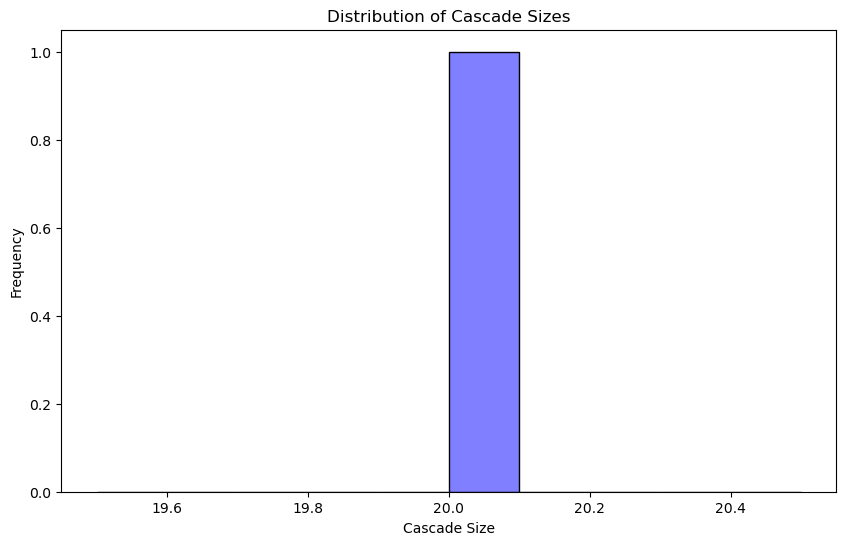

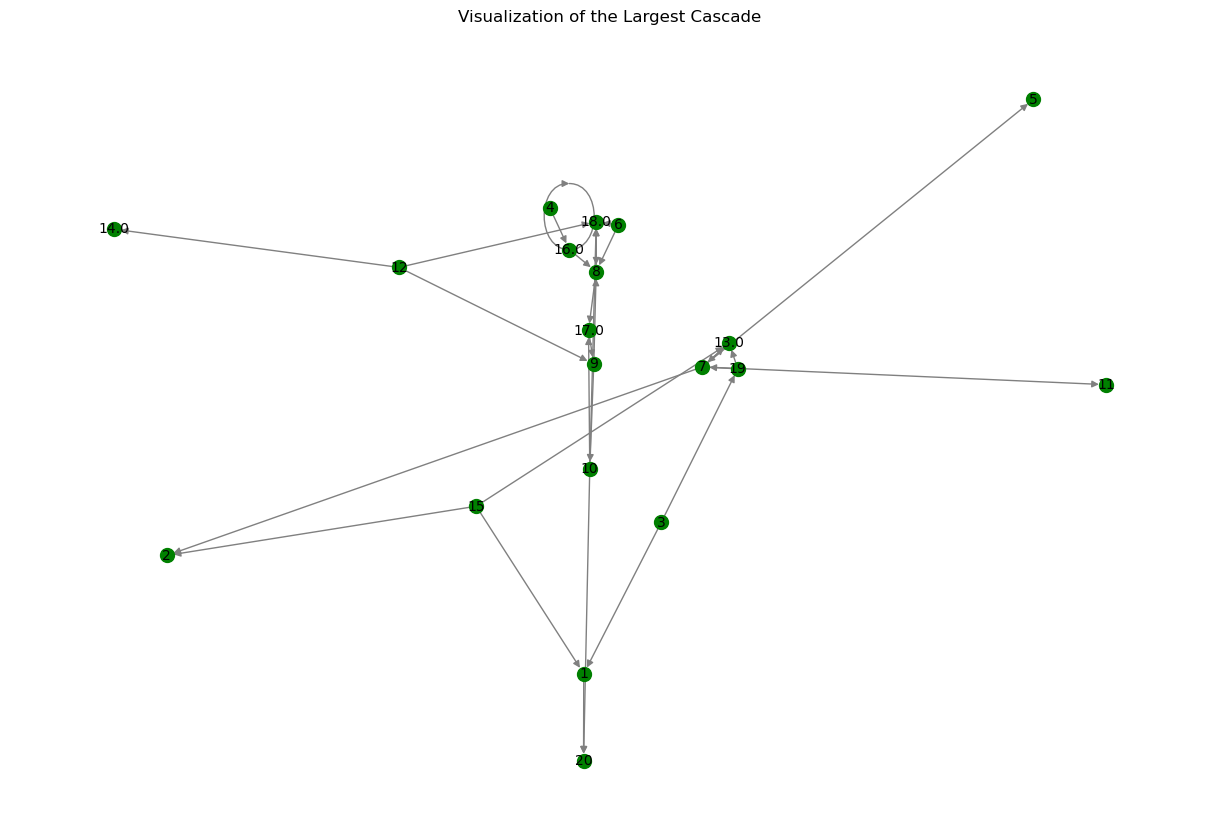

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate fake data
num_records = 100
user_ids = np.arange(1, 21)
dates = [datetime(2023, 1, 1) + timedelta(days=random.randint(0, 365)) for _ in range(num_records)]
tweets = [f"Tweet {i}" for i in range(1, num_records + 1)]
reply_to_user_ids = [random.choice(user_ids) if random.random() > 0.7 else None for _ in range(num_records)]

data = {
    'tweet_id': np.arange(1, num_records + 1),
    'user_id': np.random.choice(user_ids, num_records),
    'created_at': dates,
    'text': tweets,
    'in_reply_to_user_id': reply_to_user_ids
}

df = pd.DataFrame(data)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for index, row in df.iterrows():
    G.add_node(row['user_id'], name=f"User {row['user_id']}")
    if row['in_reply_to_user_id'] and not pd.isna(row['in_reply_to_user_id']):
        G.add_edge(row['user_id'], row['in_reply_to_user_id'])

# Display graph information manually
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
degrees = dict(G.degree())

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print("Degrees of each node:")
for node, degree in degrees.items():
    print(f"User {node}: {degree}")

# Draw the network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.15)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='blue', edge_color='gray', font_size=8)
plt.title('Social Network Graph')
plt.show()

# Function to detect cascades
def detect_cascades(graph):
    cascades = []
    for component in nx.weakly_connected_components(graph):
        if len(component) > 1:
            cascades.append(component)
    return cascades

# Detect cascades
cascades = detect_cascades(G)
print(f"Number of cascades: {len(cascades)}")
for i, cascade in enumerate(cascades[:5]):  # Display first 5 cascades
    print(f"Cascade {i+1}: {cascade}")

# Analyze the cascades (e.g., size, depth)
cascade_sizes = [len(cascade) for cascade in cascades]
plt.figure(figsize=(10, 6))
sns.histplot(cascade_sizes, kde=True, bins=10, color='b')
plt.xlabel('Cascade Size')
plt.ylabel('Frequency')
plt.title('Distribution of Cascade Sizes')
plt.show()

# Visualize a specific cascade
largest_cascade = max(cascades, key=len)
subgraph = G.subgraph(largest_cascade)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(subgraph, k=0.15)
nx.draw(subgraph, pos, with_labels=True, node_size=100, node_color='green', edge_color='gray', font_size=10)
plt.title('Visualization of the Largest Cascade')
plt.show()
